In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict
import pickle
from minisom import MiniSom

In [7]:
vectorizedSentences = []
bestWords = []
with open("data/vectorized_sentences", "rb") as fp:   # Unpickling
    vectorizedSentences = pickle.load(fp)
with open("data/best_words_for_sentences", "rb") as fp:   # Unpickling
    bestWords = pickle.load(fp)

Get Glove (https://github.com/sdadas/polish-nlp-resources#glove)

In [76]:
# data = pd.read_csv("data/unique_result.csv")
# data = pd.DataFrame.transpose(data)
# data = data.iloc[1:10][0]
# data

# from gensim.models import KeyedVectors
# glove = KeyedVectors.load_word2vec_format("data/glove_100_3_polish.txt")

# def closest_word(in_vector, top_n=1):
#     vectors = glove.values()
#     idx = np.argsort([np.linalg.norm(vec-in_vector) for vec in vectors])
#     return [glove.keys()[i] for i in idx[:top_n]]

# def vectorize_tokens(tokens):
#     words = [w for w in tokens if w is not None and w != ' ']
#     return np.array([glove.get_vector(w) for w in words])

# print(glove.get_vector('konstytucja'))

# colors = OrderedDict({
#     'prawo cywilne':'orange',
#     'prawo administracyjne':'red',
#     'prawo farmaceutyczne':'blue',
#     'prawo pracy':'green',
#     'prawo medyczne':'cyan',
#     'prawo karne':'brown',
#     'prawo międzynarodowe':'black',
#     'prawo podatkowe':'purple',
#     'prawo konstytucyjne':'grey'
# })
# speechPartNames = list(colors.keys())
# W = [vectorize_tokens(tokenized).mean(axis=0) for tokenized in data]
# W = np.array(W)
# W

# map_dim = 20
# som = MiniSom(map_dim, map_dim, 10, sigma=1.0, random_seed=1)
# # som.random_weights_init(W)
# som.train_batch(W, num_iteration=len(W)*100, verbose=True)

# from string import punctuation
# import stop_words
# stopwords = stop_words.get_stop_words('polish')
# def clearListFromUselessWords(words: list):
#     for sign in punctuation:
#         if sign in words:
#             words.remove(sign)
#     tokens = [t for t in words if t not in stopwords and t != '']
#     return tokens

# import ast
# from matplotlib.patches import Patch
# legend_elements = []
# for index,color in enumerate(colors):
#     c = list(colors.values())[index]
#     l = list(colors.keys())[index]
#     legend_elements.append(Patch(facecolor=c, edgecolor='black',label=l))
# plt.figure(figsize=(20, 20))
# texts = []
# skippedWords = 0
# allWords = 0
# for index, affair in enumerate(data.keys()):
#     words = ast.literal_eval(data[affair])
#     words = clearListFromUselessWords(words)
#     c = list(colors.values())[index]
#     allWords += len(words)
#     for word in words:
#         try:
#             vec = glove.get_vector(word)
#             winnin_position = som.winner(vec)
#             texts.append(plt.text((winnin_position[0]+np.random.rand()*.9)%map_dim, (winnin_position[1]+np.random.rand()*.9)%map_dim, word, color=c))
#         except:
#             skippedWords +=1
            
# print("Did not find {}/{} words in the GloVe database, could not estimate it's vector".format(skippedWords,allWords))
# plt.legend(handles=legend_elements, loc='upper left')
# plt.xticks(range(map_dim))
# plt.yticks(range(map_dim))
# plt.grid()
# plt.xlim([0, map_dim])
# plt.ylim([0, map_dim])
# plt.plot()

VECTORIZED SENTENCES

In [3]:
tags = ['prawo cywilne','prawo administracyjne','prawo farmaceutyczne','prawo pracy','prawo medyczne','prawo międzynarodowe','prawo podatkowe','prawo konstytucyjne','prawo karne','inne']
colors = ['orange','red','blue','green','cyan','brown','black','purple','pink','#42458f']
def get_category_index(vector):
    index = 0
    value = 0
    for i, v in enumerate(vector):
        if v > value:
            value = v
            index = i
    return index

In [4]:
W = np.array(vectorizedSentences)

In [5]:
map_dim = 20
som = MiniSom(map_dim, map_dim, 10, sigma=1.0, random_seed=1)
# som.random_weights_init(W)
som.train_batch(W, num_iteration=len(W)*100, verbose=True)

 [ 267200 / 267200 ] 100% - 0:00:00 left 
 quantization error: 0.0030924780221774327


[]

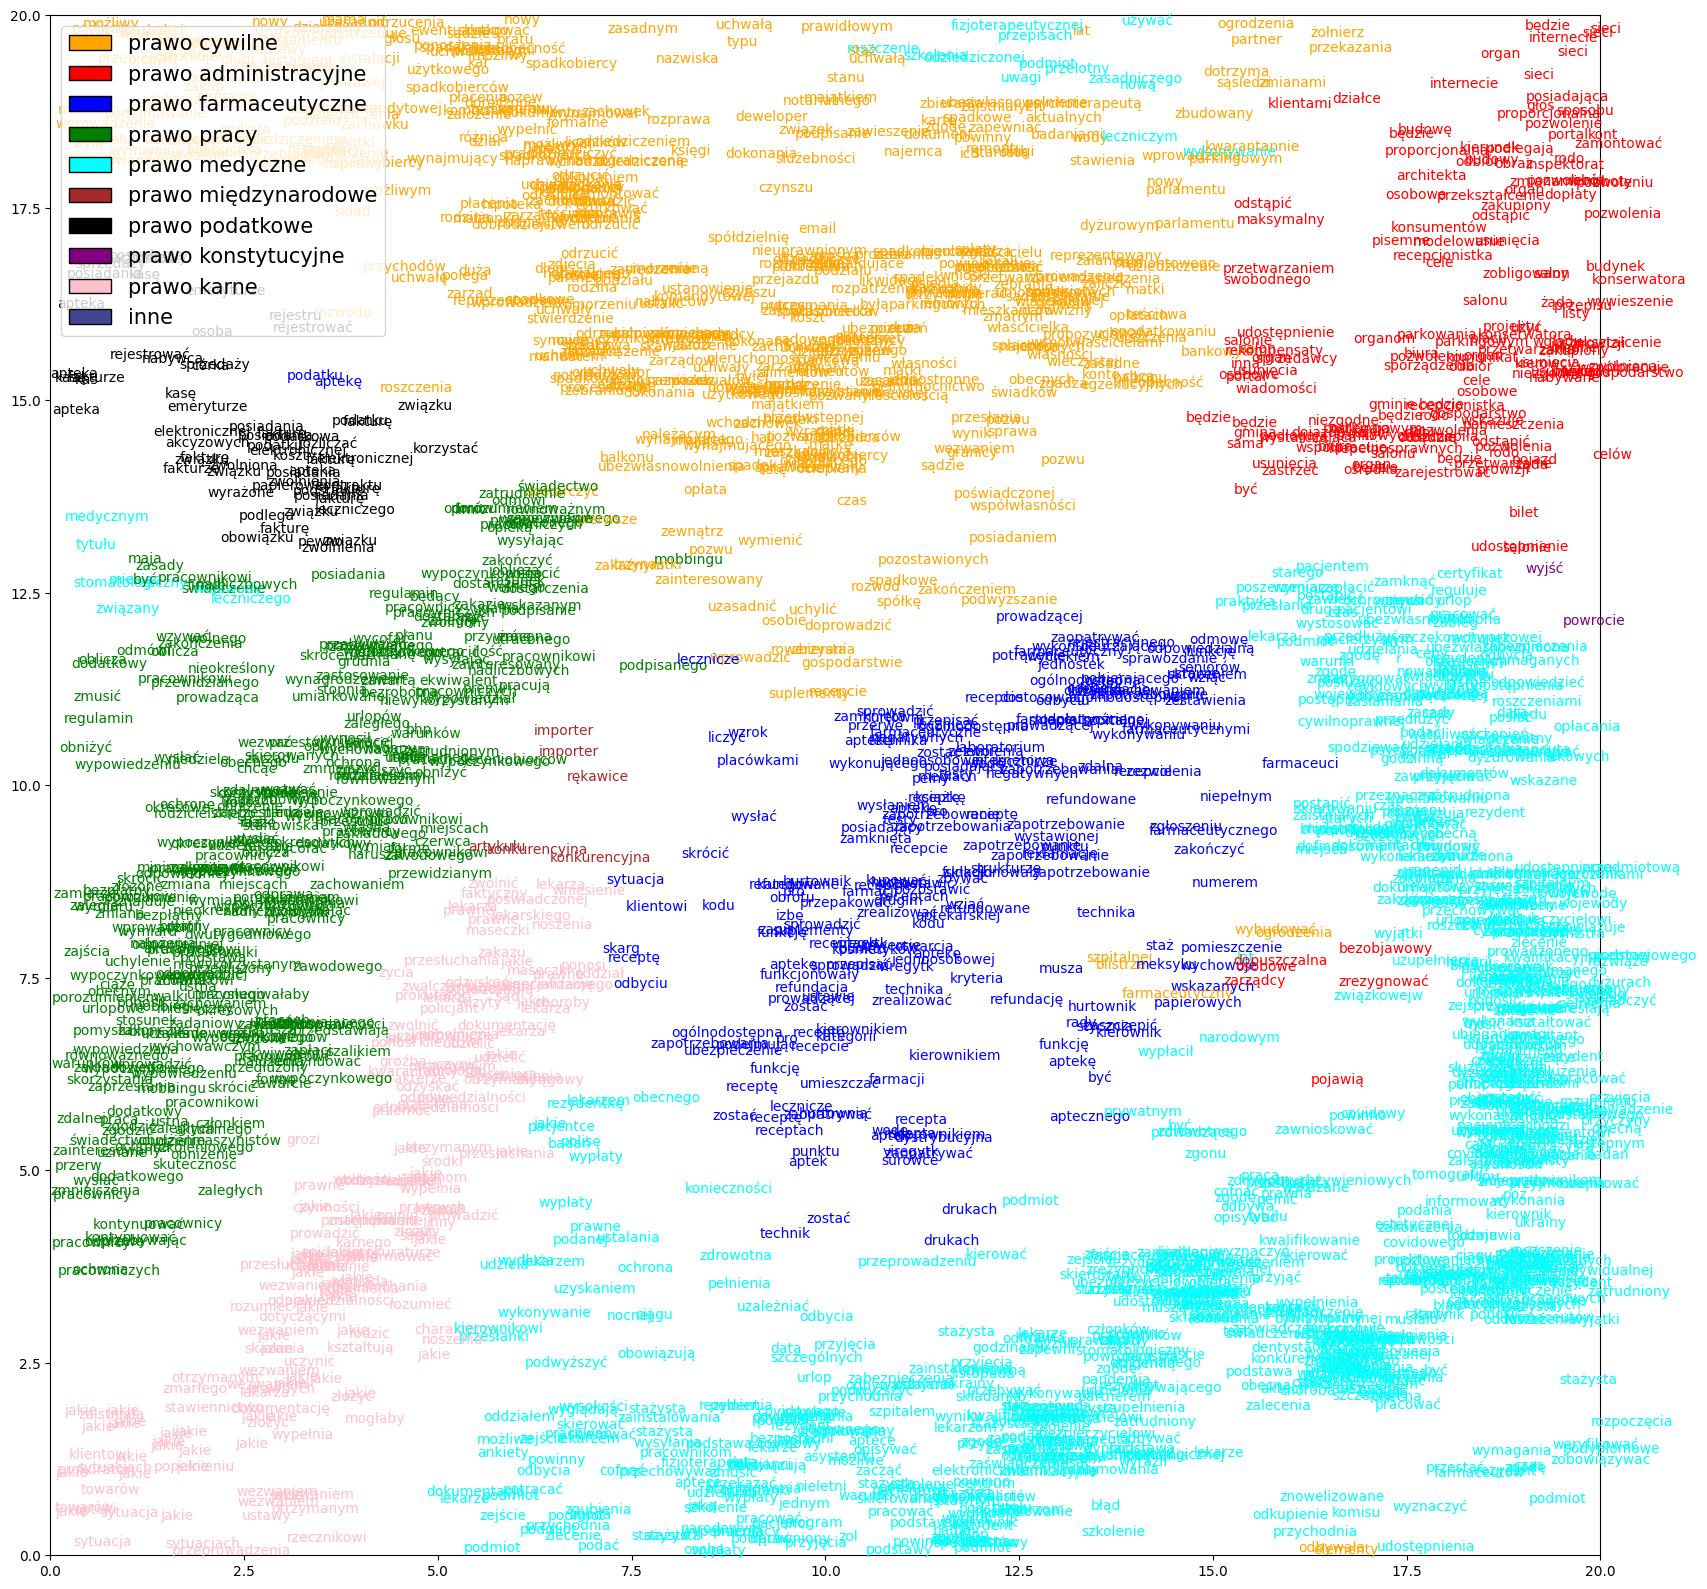

In [14]:
import ast
from matplotlib.patches import Patch
legend_elements = []
for index,color in enumerate(colors):
    c = colors[index]
    l = tags[index]
    legend_elements.append(Patch(facecolor=c, edgecolor='black',label=l))
plt.figure(figsize=(20, 20))
texts = []
for i,vec in enumerate(vectorizedSentences):
    affairIndex = get_category_index(vec)
    c = colors[affairIndex]
    winnin_position = som.winner(vec)
    text = ""
    if len(bestWords[i]) > 0:
        text = bestWords[i][0]
    if text != "":
        texts.append(plt.text((winnin_position[0]+np.random.rand()*.9)%map_dim, (winnin_position[1]+np.random.rand()*.9)%map_dim, text, color=c))

plt.legend(handles=legend_elements, loc='upper left',prop={'size': 15})
# plt.xticks(range(map_dim))
# plt.yticks(range(map_dim))
# plt.grid()
plt.xlim([0, map_dim])
plt.ylim([0, map_dim])
plt.plot()

DIGRAPH

In [2]:
from graphviz import Digraph

In [3]:
def get_category_indexes(vector):
    index = 0
    value = 0
    result = []
    for i, v in enumerate(vector):
        if v > value:
            value = v
            index = i
    for i, v in enumerate(vector):
        if v == value:
            result.append(i)
    return result

In [15]:
graph = Digraph()
tags = ['prawo cywilne','prawo administracyjne','prawo farmaceutyczne','prawo pracy','prawo medyczne','prawo międzynarodowe','prawo podatkowe','prawo konstytucyjne','prawo karne','inne']

edges = []
# Add basic nodes for legal affairs
for i, tag in enumerate(tags):
    graph.node(str(i), tag)

# Add words from vectors
for i, vec in enumerate(vectorizedSentences):
    nodeId = "vec{}".format(i)
    text = nodeId
    if len(bestWords[i]) > 0:
        text = bestWords[i][0]
    graph.node(nodeId,text)
    categoryIndexes = get_category_indexes(vec)
    if len(categoryIndexes) == 0:
        continue
    for index in categoryIndexes:
        edge = "{}{}".format(nodeId,str(index))
        edges.append(edge)

# graph.edges(edges)
graph.edges(('0','1'),('1','2'))


TypeError: edges() takes 2 positional arguments but 3 were given

In [11]:
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH